In [144]:
import pandas as pd
import numpy as np
import os
import anndata as ad
import seaborn
import scanpy as sc

In [143]:
# Mapping the batch corrected phenotypes to the quantification and regionprops tables with raw values based on CellID
base_dir = '/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/QC/standard'
phenotypes_dir = os.path.join(base_dir, 'phenotyping/phenotypes_scanorama_corrected_complete')
quantification_dir = os.path.join(base_dir, 'merged_csv')
regionprops_dir = os.path.join(base_dir, 'regionprops')
regionprops_annotated_dir = os.path.join(base_dir, 'regionprops_annotated')
merged_csv_annotation_dir = os.path.join(base_dir, 'merged_csv_annotated')

In [5]:
if not os.path.exists(regionprops_annotated_dir):
    try:
        os.makedirs(regionprops_annotated_dir)
        print(f"Directory created: {regionprops_annotated_dir}")
    except PermissionError as e:
        print(f"PermissionError: {e}")
else:
    print(f"Directory already exists: {regionprops_annotated_dir}")

if not os.path.exists(merged_csv_annotation_dir ):
    try:
        
        os.makedirs(merged_csv_annotation_dir)
        print(f"Directory created: {regionprops_annotated_dir}")
    except PermissionError as e:
        print(f"PermissionError: {e}")
        
else:
    print(f"Directory already exists: {merged_csv_annotation_dir}")

Directory already exists: /Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/QC/standard/regionprops_annotated
Directory already exists: /Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/QC/standard/merged_csv_annotated


In [86]:
for file in os.listdir(phenotypes_dir):
    if not file.endswith('.csv'):
        continue
    phenotypes = pd.read_csv(os.path.join(phenotypes_dir, file))
    phenotypes = phenotypes.drop(columns=[col for col in phenotypes.columns if col not in ['CellID', 'Phenotype']])
    phenotypes = phenotypes.rename(columns={'CellID': 'Object'})
    merged = pd.read_csv(os.path.join(quantification_dir, file))
    regionprops = pd.read_csv(os.path.join(regionprops_dir, file))
    merged_merged = pd.merge(merged, phenotypes, on='Object', how='left')
    regionprops_merged = pd.merge(regionprops, phenotypes, on='Object', how='left')
    merged_merged.to_csv(os.path.join(merged_csv_annotation_dir, file), index=False)
    regionprops_merged.to_csv(os.path.join(regionprops_annotated_dir, file), index=False)

In [145]:
matrix_columns = [' 1', ' 2', ' 3', ' 4', ' 5', 'CD38', 'Perilipin', 'Vimentin',
                  'B4GALT1', 'MPO', 'CathepsinK', 'ATP5A', 'RUNX2', 'HIF1A', 'CD11b',
                  'CD45', 'CS', 'CD11c', 'CD36', 'CD4', 'CD34', 'CD68', 'IL32', 'IDO',
                  'CD8', 'GranzymeK', 'PKM2', 'IRF4', 'GLUT1', 'GranzymeB', 'Ki67',
                  'CollagenTypeI', 'CD3', 'HistoneH3', 'CPT1A', 'CD98', 'HLA-DR',
                  'ST6GAL1', 'CD138', '191Ir', '193Ir', ' 6']
X_list = []
obs_list = []

for file in os.listdir(merged_csv_annotation_dir):
    if not file.endswith('.csv'):
        continue
    df = pd.read_csv(os.path.join(merged_csv_annotation_dir, file))
    X = df[matrix_columns].values
    obs_columns = ['Object', 'area', 'centroid-0', 'centroid-1', 'axis_major_length', 'axis_minor_length',
                   'eccentricity', 'distance_to_bone', 'Phenotype']
    obs = df[obs_columns]
    obs['image_ID'] = file
    
    X_list.append(X)
    obs_list.append(obs)
X_combined = np.concatenate(X_list)
obs_combined = pd.concat(obs_list, ignore_index=True)

/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_85359/2029281343.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs['image_ID'] = file
/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_85359/2029281343.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs['image_ID'] = file
/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_85359/2029281343.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [146]:
adata = ad.AnnData(X=X_combined, obs=obs_combined, var=matrix_columns)
adata.obs_names = 'Object ' + adata.obs['Object'].astype(str) + ' in ' + adata.obs['image_ID']
adata.var_names = matrix_columns
# columns_to_remove = [' 1', ' 2', ' 3', ' 4', ' 5', 'HistoneH3', '191Ir', '193Ir', ' 6']
# mask = ~adata.var_names.isin(columns_to_remove)
# adata = adata[:, mask].copy()

/Users/lukashat/miniforge3/envs/squidpy/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [147]:
adata.var_names

Index([' 1', ' 2', ' 3', ' 4', ' 5', 'CD38', 'Perilipin', 'Vimentin',
       'B4GALT1', 'MPO', 'CathepsinK', 'ATP5A', 'RUNX2', 'HIF1A', 'CD11b',
       'CD45', 'CS', 'CD11c', 'CD36', 'CD4', 'CD34', 'CD68', 'IL32', 'IDO',
       'CD8', 'GranzymeK', 'PKM2', 'IRF4', 'GLUT1', 'GranzymeB', 'Ki67',
       'CollagenTypeI', 'CD3', 'HistoneH3', 'CPT1A', 'CD98', 'HLA-DR',
       'ST6GAL1', 'CD138', '191Ir', '193Ir', ' 6'],
      dtype='object')

In [148]:
column_to_check = 'Object'
original_values = obs_combined[column_to_check].tolist()
anndata_values = adata.obs[column_to_check].tolist()

if original_values == anndata_values:
    print("Rows match correctly.")
else:
    print("Rows do not match.")

Rows match correctly.


In [149]:
adata2 = ad.read_h5ad('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/QC/standard/cells.h5ad')

In [150]:
adata.var = adata.var.rename(columns={0: 'name'})
adata.var['channel'] = adata2.var['channel']
adata.var['deepcell'] = adata2.var['deepcell']
adata.obs.rename(columns={'centroid-0': 'Y-Centroid'}, inplace=True)
adata.obs.rename(columns={'centroid-1': 'X-Centroid'}, inplace=True)
adata.obs['disease'] = adata.obs['image_ID'].str.split('_').str[2]
adata.obs['patient_ID'] = adata.obs['image_ID'].str.split('_').str[1]
adata.obs['ROI'] = adata.obs['image_ID'].str.split('_').str[3].str.split('.').str[0]

In [155]:
adata.var

,name,channel,deepcell
1,1,ArAr80,NaN
2,2,I127,NaN
3,3,Xe131,NaN
4,4,Xe134,NaN
5,5,Ba138,NaN
CD38,CD38,Pr141,NaN
Perilipin,Perilipin,Nd142,NaN
Vimentin,Vimentin,Nd143,NaN
B4GALT1,B4GALT1,Nd144,NaN
MPO,MPO,Nd145,NaN


In [156]:
adata.write_h5ad(os.path.join(base_dir, 'cells_annotated.h5ad'))

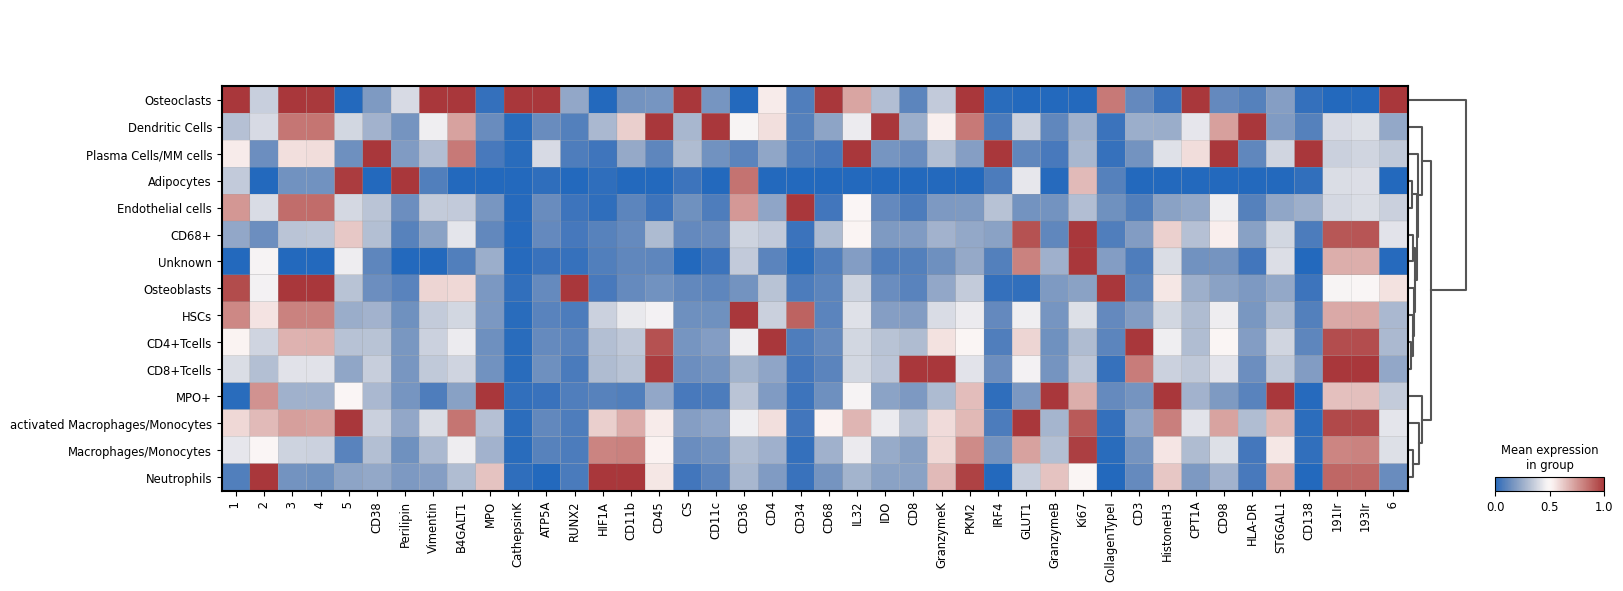

In [116]:
adata.obs['Phenotype'] = adata.obs['Phenotype'].astype('category')
sc.tl.dendrogram(adata, groupby='Phenotype')
sc.pl.matrixplot(adata, var_names= adata.var_names, groupby='Phenotype', dendrogram=True, use_raw=False, cmap="vlag", standard_scale='var')

In [118]:
adata.raw = adata

In [119]:
adata.X = np.arcsinh(adata.X/1)

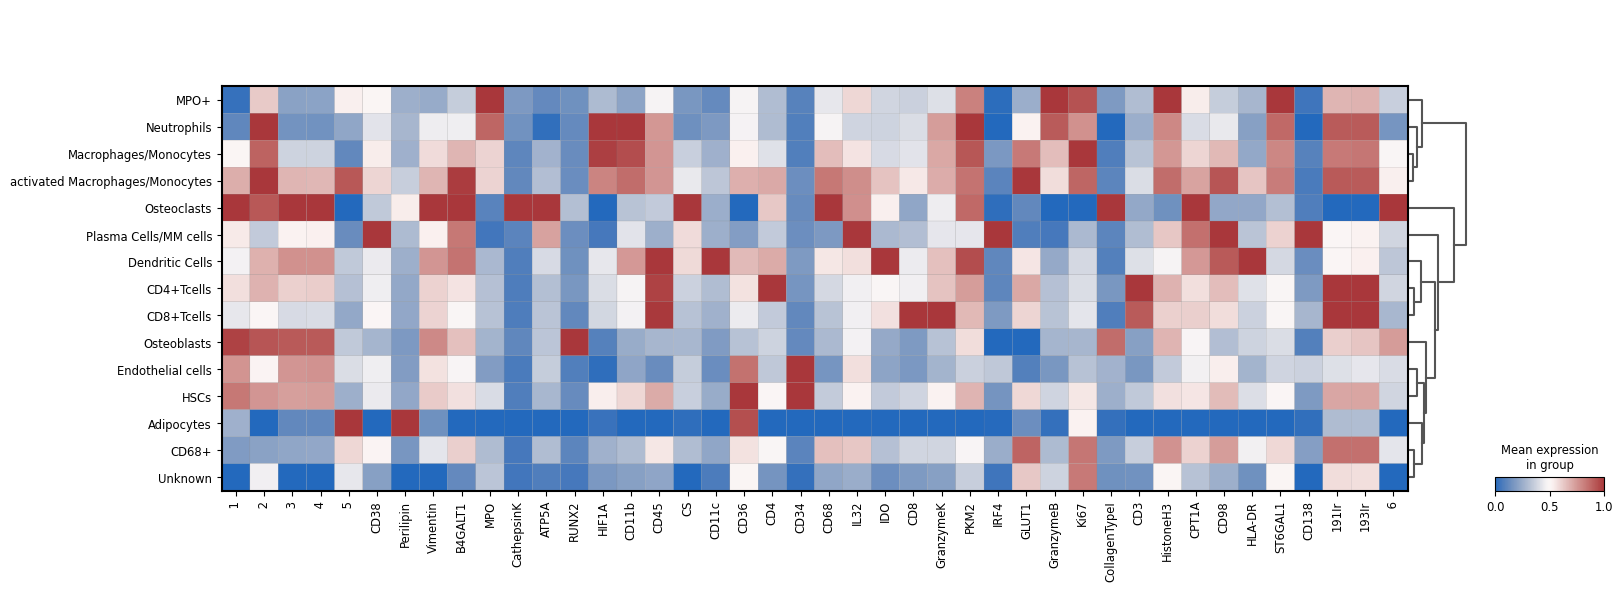

In [120]:
adata.obs['Phenotype'] = adata.obs['Phenotype'].astype('category')
sc.tl.dendrogram(adata, groupby='Phenotype')
sc.pl.matrixplot(adata, var_names= adata.var_names, groupby='Phenotype', dendrogram=True, use_raw=False, cmap="vlag", standard_scale='var')

In [123]:
adata.raw.X

array([[5.85190582e+03, 1.59636996e+01, 7.26834219e+01, ...,
        8.02203783e+00, 1.17154330e+01, 5.05005546e-01],
       [5.83435848e+03, 2.03494831e+01, 7.13761584e+01, ...,
        2.50116926e+00, 3.73506416e+00, 1.58823466e+00],
       [5.84377663e+03, 2.55183036e+01, 7.76024393e+01, ...,
        6.00552617e+00, 1.16055920e+01, 1.08257846e+00],
       ...,
       [9.93475926e+03, 3.44522527e+01, 1.08457569e+02, ...,
        6.08751241e+00, 1.01733370e+01, 1.48634635e+00],
       [9.85695215e+03, 2.55147682e+01, 1.13854731e+02, ...,
        8.71217148e+00, 1.48698822e+01, 8.25641155e-01],
       [9.85531693e+03, 2.36583165e+01, 1.09434453e+02, ...,
        3.06958829e+00, 3.29951601e+00, 7.38678018e-01]])